In [7]:
using Plots, TaylorSeries

### Método de Newton

En una variable: 

$$x_{n+1} = x_{n} - \dfrac{f(x_{n})}{f'(x_{n})}$$

En varias variables:

$$\vec{x_{n+1}} = \vec{x_{n}} - \left[\textbf{J}(\vec{x_{n}})\right]^{-1}F(\vec{x_{n}})$$


#### Ejemplo 1

$$g(u,\lambda) = (u^{2} -1)(u^{2}-4) + \lambda u^{2} e^{u/10}$$

$$\dfrac{dg}{du}(u,\lambda) = (2u)(u^{2}-4 + u^{2}-1) + 2 \lambda u e^{u/10} + \dfrac{\lambda u^{2} e^{u/10}}{10} = 4u^{3}-10u  + 2 \lambda u e^{u/10} + \dfrac{\lambda u^{2} e^{u/10}}{10}$$

In [8]:
"""


        Newton(f,p,x0::Float64,orden::Int64; ite = 20, tol = 1e-16)


Esta función devuelve una raíz de la función `f` que tiene como argumento una variable de tipo arbitrario `x` y un parámetro `p`, es decir, `f(x,p)`.

Los parámetros de entrada son la función `f`, el parámetro `p`, un valor cercano a la raíz dado de forma arbitraria `x0::Float64`, el orden de la serie de Taylor `orden::Int64` y los parámetros opcionales `ite::Int64` que limita el número de iteraciones del método y `tol::Float64` es la máxima tolerancia que deseas en el valor `f(x_raiz,p)`

La función devuelve el valor de la raíz si entra dentro de la tolerancia y devuelve `NaN` si el valor al que se convergió no es una raíz o no está dentro de la tolerancia.
"""
function Newton(f,p,x0::Float64,orden::Int64; ite = 20, tol = 1e-16)
    x_new = x0
    i = 1
    while i <= ite && f(x_new,p) != 0.0
        x_old = x_new
        x = Taylor1([x_old,1],orden)
        x_new = x_old - (f(x,p)/differentiate(f(x,p)))(0.0)
        i += 1
    end
    if abs(f(x_new,p)) <= tol
        return x_new
    else
        println("El método no convergió en la tolerancia deseada\t |f($(x_new),$(p))| = $(abs(f(x_new,p))) > $(tol)")
        return NaN
    end
end

Newton

In [9]:
"""


        Newton(f,p,x0,df::Float64; ite = 20, tol = 1e-16)


Esta función devuelve una raíz de la función `f` que tiene como argumento una variable de tipo arbitrario `x` y un parámetro `p`, es decir, `f(x,p)`.

Los parámetros de entrada son la función `f`, su función derivada `df`, el parámetro `p`, un valor cercano a la raíz dado de forma arbitraria `x0::Float64` y los parámetros opcionales `ite::Int64` que limita el número de iteraciones del método y `tol::Float64` es la máxima tolerancia que deseas en el valor `f(x_raiz,p)`

La función devuelve el valor de la raíz si entra dentro de la tolerancia y devuelve `NaN` si el valor al que se convergió no es una raíz o no está dentro de la tolerancia.
"""
function Newton(f,p,x0::Float64,df; ite = 20, tol = 1e-16)
    x_new = x0
    i = 1
    while i <= ite && f(x_new,p) != 0.0
        x_old = x_new
        x_new = x_old - f(x_old,p)/df(x_old,p)
        i += 1
    end
    if abs(f(x_new,p)) <= tol
        return x_new
    else
        println("El método no convergió en la tolerancia deseada\t |f($(x_new),$(p))| = $(abs(f(x_new,p))) > $(tol)")
        return NaN
    end
end

Newton

In [65]:
"""

    X = Estabilidad(f,x0::Float64,P::Vector{Float64},orden::Int64; Tol = 1.e-16)

Esta función regresa una lista de los puntos estables `X::Vector{Float64}` de igual longitud que la lista de parámetros `P::Vector{Float64}` de la ecuación diferncial descrita por la función `f` a partir de un punto estable conocido `x0::FLoat64` para el primer elemento de la lista de parámetros, es decir:

       f(x0,P[1]) <= Tol

Si la función tiene varios puntos estables para el parámetro `P[1]`, evalua `Estabilidad` para cada uno de esos puntos estables.

Si para algún parámetro de `P[i]`no existe un punto estable, le corresponderá un valor `X[i] = NaN` en el vector de salida.

Al poner el parámetro `orden::Int64` en la cuarta entrada, está función se ejecutara haciendo uso de la paquetería `TaylorSeries.jl`. Este método es útil cuando no conoces analíticamente la derivada de `f`.

"""
function Estabilidad(f,x0::Float64,P::Vector{Float64},orden::Int64; Tol = 1.e-16)
    N = length(P)
    X = zeros(N)
    x_old = Newton(f,P[1],x0,orden; tol = Tol)
    X[1] = x_old
    for i in 2:N
        x_new =  Newton(f,P[i],x_old,orden; tol = Tol)
        if !isnan(NaN)
            x_old = x_new
        end
        X[i] = x_new
    end
    return X
end

Estabilidad

In [66]:
"""

    X = Estabilidad(f,x0::Float64,P::Vector{Float64},df; Tol = 1.e-16)

Si se introduce la función derivada `df` de la función `f` asociada a la ecuación diferencial en la cuarta entrada en lugar del parámetro `orden` se obtiene el mismo resultado. 

Este método es útil cuando puedes obtener analíticaente la derivada exacta de la función `f`.


"""
function Estabilidad(f,x0::Float64,P::Vector{Float64},df; Tol = 1.e-16)
    N = length(P)
    X = zeros(N)
    x_old = Newton(f,P[1],x0,df; tol = Tol)
    X[1] = x_old
    for i in 2:N
        x_new =  Newton(f,P[i],x_old,df; tol = Tol)
        if !isnan(NaN)
            x_old = x_new
        end
        X[i] = x_new
    end
    return X
end

Estabilidad

In [67]:
?Newton

search: Newton



```
    Newton(f,p,x0::Float64,orden::Int64; ite = 20, tol = 1e-16)
```

Esta función devuelve una raíz de la función `f` que tiene como argumento una variable de tipo arbitrario `x` y un parámetro `p`, es decir, `f(x,p)`.

Los parámetros de entrada son la función `f`, el parámetro `p`, un valor cercano a la raíz dado de forma arbitraria `x0::Float64`, el orden de la serie de Taylor `orden::Int64` y los parámetros opcionales `ite::Int64` que limita el número de iteraciones del método y `tol::Float64` es la máxima tolerancia que deseas en el valor `f(x_raiz,p)`

La función devuelve el valor de la raíz si entra dentro de la tolerancia y devuelve `NaN` si el valor al que se convergió no es una raíz o no está dentro de la tolerancia.

---

```
    Newton(f,p,x0,df::Float64; ite = 20, tol = 1e-16)
```

Esta función devuelve una raíz de la función `f` que tiene como argumento una variable de tipo arbitrario `x` y un parámetro `p`, es decir, `f(x,p)`.

Los parámetros de entrada son la función `f`, su función derivada `df`, el parámetro `p`, un valor cercano a la raíz dado de forma arbitraria `x0::Float64` y los parámetros opcionales `ite::Int64` que limita el número de iteraciones del método y `tol::Float64` es la máxima tolerancia que deseas en el valor `f(x_raiz,p)`

La función devuelve el valor de la raíz si entra dentro de la tolerancia y devuelve `NaN` si el valor al que se convergió no es una raíz o no está dentro de la tolerancia.


In [68]:
?Estabilidad

search: Estabilidad



```
X = Estabilidad(f,x0::Float64,P::Vector{Float64},df; Tol = 1.e-16)
```

Si se introduce la función derivada `df` de la función `f` asociada a la ecuación diferencial en la cuarta entrada en lugar del parámetro `orden` se obtiene el mismo resultado. 

Este método es útil cuando puedes obtener analíticaente la derivada exacta de la función `f`.

---

```
X = Estabilidad(f,x0::Float64,P::Vector{Float64},orden::Int64; Tol = 1.e-16)
```

Esta función regresa una lista de los puntos estables `X::Vector{Float64}` de igual longitud que la lista de parámetros `P::Vector{Float64}` de la ecuación diferncial descrita por la función `f` a partir de un punto estable conocido `x0::FLoat64` para el primer elemento de la lista de parámetros, es decir:

```
   f(x0,P[1]) <= Tol
```

Si la función tiene varios puntos estables para el parámetro `P[1]`, evalua `Estabilidad` para cada uno de esos puntos estables.

Si para algún parámetro de `P[i]`no existe un punto estable, le corresponderá un valor `X[i] = NaN` en el vector de salida.

Al poner el parámetro `orden::Int64` en la cuarta entrada, está función se ejecutara haciendo uso de la paquetería `TaylorSeries.jl`. Este método es útil cuando no conoces analíticamente la derivada de `f`.


In [16]:
g(u,λ) = (u^2 -1)*(u^2-4) + λ*u^2*exp(u/10)
dg(u,λ) = 4*u^3 -10*u + 2*λ*u*exp(u/10) + (λ*u^2*exp(u/10))/10;

In [17]:
Λ = Vector(0.0:0.01:1.0)
U0 = [-2.0,-1.0,1.0,2.0];

In [19]:
orden = 20
ϵ = [1.e-16,1.e-15,1.e-14];

In [20]:
U_sol_T = [[Estabilidad(g,u0,Λ,orden; Tol = i) for u0 in U0] for i in ϵ];

El método no convergió en la tolerancia deseada	 |f(-1.997265786825975,0.01)| = 1.0408340855860843e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9945212666158567,0.02)| = 6.522560269672795e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9890007795018814,0.04)| = 3.3306690738754696e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9862245424992016,0.05)| = 1.6653345369377348e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9834374580776908,0.06)| = 5.828670879282072e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.980639383458718,0.07)| = 3.608224830031759e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9778301725917327,0.08)| = 5.551115123125783e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9750096760475881,0.09)| = 9.43689570931383e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9721777409073433,0.1)| = 1.11022302462515

In [21]:
U_sol_A = [[Estabilidad(g,u0,Λ,dg; Tol = i) for u0 in U0] for i in ϵ];

El método no convergió en la tolerancia deseada	 |f(-1.997265786825975,0.01)| = 1.0408340855860843e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9945212666158567,0.02)| = 6.522560269672795e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9890007795018814,0.04)| = 3.3306690738754696e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9862245424992016,0.05)| = 1.6653345369377348e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9834374580776908,0.06)| = 5.828670879282072e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.980639383458718,0.07)| = 3.608224830031759e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9778301725917327,0.08)| = 5.551115123125783e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9750096760475881,0.09)| = 9.43689570931383e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9721777409073433,0.1)| = 1.11022302462515

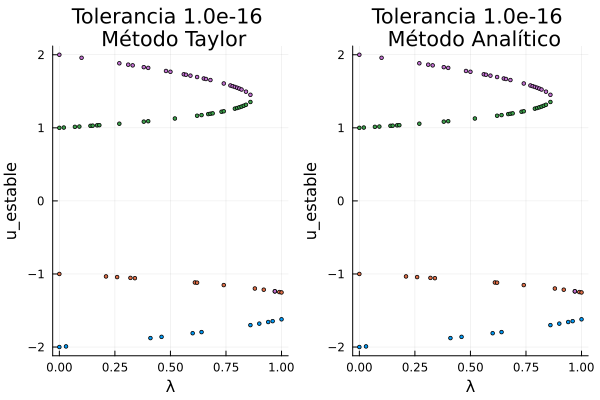

In [58]:
T1 = scatter(Λ, U_sol_T[1],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[1]) \n Método Taylor",markersize = 2)
#plot!(Λ, U_sol_T[1],label = "",linewidth = 3 )
A1 = scatter(Λ, U_sol_A[1],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[1]) \n Método Analítico",markersize = 2)
#plot!(Λ, U_sol_A[1],label = "",linewidth = 3 )
plot(T1,A1)

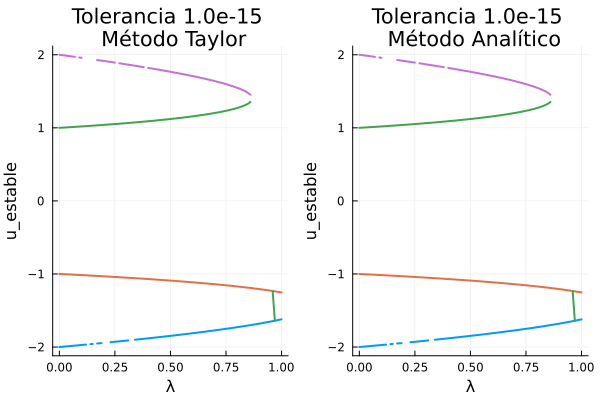

In [56]:
T2 = plot(Λ, U_sol_T[2],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[2]) \n Método Taylor",linewidth = 2)
#scatter!(Λ, U_sol_T[2],label = "", markersize = 2)
A2 = plot(Λ, U_sol_A[2],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[2]) \n Método Analítico",linewidth = 2)
#scatter!(Λ, U_sol_A[2],label = "", markersize = 2)
plot(T2,A2)

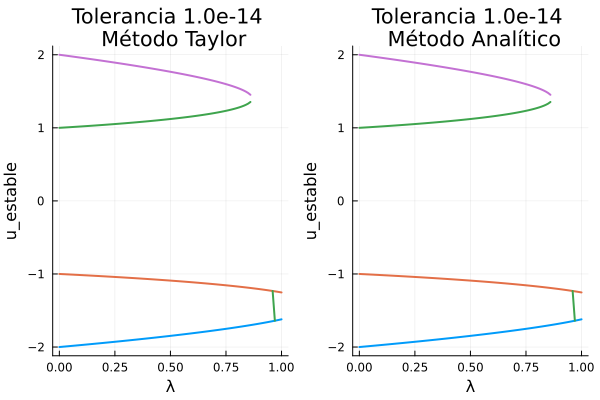

In [57]:
T3 = plot(Λ, U_sol_T[3],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[3]) \n Método Taylor",linewidth = 2)
#scatter!(Λ, U_sol_T[3],label = "", markersize = 2)
A3 = plot(Λ, U_sol_A[3],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[3]) \n Método Analítico",linewidth = 2)
#scatter!(Λ, U_sol_A[3],label = "", markersize = 2)
plot(T3,A3)

In [69]:
function f!(u,du,λ)
    du[1] = u[1] * u[2]
    du[2] = u[2] + u[1]^2
end

f! (generic function with 1 method)

In [ ]:
function Newton(f,p,x0::Vector{Float64},orden::Int64; ite = 20, tol = 1e-16)
    N = length(x0)
    x_new = x0
    x = set_variables("x", numvars=N)
    
    while i <= ite && f(x_new,p) != 0.0
        x_old = x_new
        x = Taylor1([x_old,1],orden)
        x_new = x_old - (f(x,p)/differentiate(f(x,p)))(0.0)
        i += 1
    end
    if abs(f(x_new,p)) <= tol
        return x_new
    else
        println("El método no convergió en la tolerancia deseada\t |f($(x_new),$(p))| = $(abs(f(x_new,p))) > $(tol)")
        return NaN
    end
end